<a href="https://colab.research.google.com/github/1pritesh1/PythonLearning2021/blob/main/NY_Taxi_Fare_Predict_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('project-3-ny-taxi-fare-prediction v2')
jovian.set_colab_id('1XdgSCYQ9x3k00cPd1PWNXyenvpkrZwgq')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pritesh009/project-3-ny-taxi-fare-prediction-v2


'https://jovian.ai/pritesh009/project-3-ny-taxi-fare-prediction-v2'

In [1]:
import pandas as pd
import numpy as np
!pip install pyarrow --upgrade --quiet

     |████████████████████████████████| 23.6 MB 123 kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt

In [4]:
train = '/content/drive/MyDrive/train.csv'
test = '/content/drive/MyDrive/test.csv'

In [5]:
%%time
df = pd.read_csv(train ,nrows = 400000)

CPU times: user 1.1 s, sys: 154 ms, total: 1.26 s
Wall time: 2.59 s


In [6]:
%%time
test_df = pd.read_csv(test)

CPU times: user 22.9 ms, sys: 1.99 ms, total: 24.9 ms
Wall time: 802 ms


In [7]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
use_cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']

selected_dtypes = {
    'passenger_count': 'int16',
    'fare_amount':'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32' 
}

In [9]:
%%time
df3 = pd.read_csv(train,
                  usecols=use_cols,
                  dtype=selected_dtypes, 
                  parse_dates=['pickup_datetime'],nrows = 400000)

CPU times: user 1min 8s, sys: 360 ms, total: 1min 9s
Wall time: 1min 9s


In [10]:
selected_cols = ['key','pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']
df3_test = pd.read_csv(test,
                  usecols=selected_cols,
                  dtype=selected_dtypes, 
                  parse_dates=['pickup_datetime'])

## Add date features**

In [11]:
def night (dataTbl):
    if (dataTbl['hour'] <= 6) or (dataTbl['hour'] >= 20):
        return 1
    else:
        return 0

def datefeatures(dataTbl):
  if set(['pickup_datetime']).issubset(dataTbl.columns):
    dataTbl['year']=dataTbl['pickup_datetime'].dt.year
    dataTbl['day']=dataTbl['pickup_datetime'].dt.day
    dataTbl['month']=dataTbl['pickup_datetime'].dt.month
    dataTbl['weekday']=dataTbl['pickup_datetime'].dt.weekday
    dataTbl['hour']=dataTbl['pickup_datetime'].dt.hour
    dataTbl['night'] = dataTbl.apply (lambda x: night(x), axis=1)
    dataTbl.drop('pickup_datetime', axis = 1, inplace = True)
    return dataTbl.head(5)
  else:
    return  dataTbl.head(5)


In [12]:
df3.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
datefeatures(df3_test)

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,night
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,2015,27,1,1,13,0
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,2015,27,1,1,13,0
2,2011-10-08 11:53:44.0000002,-73.982521,40.751259,-73.979652,40.746140,1,2011,8,10,5,11,0
3,2012-12-01 21:12:12.0000002,-73.981163,40.767807,-73.990448,40.751637,1,2012,1,12,5,21,1
4,2012-12-01 21:12:12.0000003,-73.966049,40.789776,-73.988564,40.744427,1,2012,1,12,5,21,1


In [14]:
datefeatures(df3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,night
0,4.5,-73.844315,40.721317,-73.841614,40.712276,1,2009,15,6,0,17,0
1,16.9,-74.016045,40.711304,-73.979271,40.782005,1,2010,5,1,1,16,0
2,5.7,-73.982735,40.761269,-73.991241,40.750561,2,2011,18,8,3,0,1
3,7.7,-73.987129,40.733143,-73.991570,40.758091,1,2012,21,4,5,4,1
4,5.3,-73.968094,40.768009,-73.956657,40.783764,1,2010,9,3,1,7,0


## Add Distance using geo info

#### Distance Using geopanda

In [15]:
pip install geopy

In [16]:
df3.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'day', 'month', 'weekday', 'hour', 'night'],
      dtype='object')

In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
df3[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude']].describe(percentiles=[.01,.05,.1,.25,.5,.9,.95,.99])


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,400000.00,400000.00,399997.00,399997.00
mean,-72.54,40.04,-72.54,40.04
std,11.26,8.34,10.85,6.50
min,-740.00,-3116.29,-1329.62,-1189.62
1%,-74.01,0.00,-74.02,0.00
5%,-74.01,40.70,-74.01,40.69
10%,-74.00,40.72,-74.00,40.71
25%,-73.99,40.73,-73.99,40.73
50%,-73.98,40.75,-73.98,40.75
90%,-73.95,40.78,-73.95,40.78


In [19]:
import geopy.distance

In [20]:
def cleanLongLat(df):

    df.drop(df[(df.pickup_longitude < -76) | (df.pickup_longitude > -71) | 
              (df.pickup_latitude < 38) | (df.pickup_latitude > 42)].index,axis=0,inplace=True)
    df.drop(df[(df.dropoff_longitude < -76) | (df.dropoff_longitude > -71) | 
              (df.dropoff_latitude < 38) | (df.dropoff_latitude > 42)].index,axis=0,inplace=True)

def geodesic_dist(df):
    pickup_lat = df['pickup_latitude']
    pickup_long = df['pickup_longitude']
    dropoff_lat = df['dropoff_latitude']
    dropoff_long = df['dropoff_longitude']
    distance = geopy.distance.geodesic((pickup_lat, pickup_long), 
                                       (dropoff_lat, dropoff_long)).km
    try:
        return distance
    except ValueError:
        return np.nan
    
def circle_dist(df):
    pickup_lat = df['pickup_latitude']
    pickup_long = df['pickup_longitude']
    dropoff_lat = df['dropoff_latitude']
    dropoff_long = df['dropoff_longitude']
    distance = geopy.distance.great_circle((pickup_lat, pickup_long), 
                                       (dropoff_lat, dropoff_long)).km
    try:
        return distance
    except ValueError:
        return np.nan

def latlong_diff(df):
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    # Add new features
    df['latdiff'] = (lat1 - lat2)
    df['londiff'] = (lon1 - lon2)
    df['euclidean'] = (df['latdiff'] ** 2 + df['londiff'] ** 2) ** 0.5

# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

def dist_grouping(df):
    bins= [0,6,12,18,24,30,300]
    labels = [1,2,3,4,5,6]
    df['dist_group'] = pd.cut(df['distance'], bins=bins, labels=labels, right=False)

def geoDisCols(df):
    cleanLongLat(df)
    df.dropna(inplace=True)
    df['geopyDesic_dist'] = df.apply(lambda x: geodesic_dist(x), axis = 1 )
    df['geopyGrtCir_dist'] = df.apply(lambda x: circle_dist(x), axis = 1 )
    df['distance'] = haversine(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude,df.dropoff_longitude)
    dist_grouping(df)
    latlong_diff(df)
    

In [21]:
geoDisCols(df3)

In [22]:
geoDisCols(df3_test)

In [23]:
df3_test.head(3)

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,night,geopyDesic_dist,geopyGrtCir_dist,distance,dist_group,latdiff,londiff,euclidean
0,2015-01-27 13:08:24.0000002,-73.97,40.76,-73.98,40.74,1,2015,27,1,1,13,0,2.32,2.32,2.32,1,0.02,0.01,0.02
1,2015-01-27 13:08:24.0000003,-73.99,40.72,-74.00,40.74,1,2015,27,1,1,13,0,2.42,2.43,2.43,1,-0.02,0.01,0.02
2,2011-10-08 11:53:44.0000002,-73.98,40.75,-73.98,40.75,1,2011,8,10,5,11,0,0.62,0.62,0.62,1,0.01,-0.00,0.01


In [24]:
df3.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,night,geopyDesic_dist,geopyGrtCir_dist,distance,dist_group,latdiff,londiff,euclidean
0,4.50,-73.84,40.72,-73.84,40.71,1,2009,15,6,0,17,0,1.03,1.03,1.03,1,0.01,-0.00,0.01
1,16.90,-74.02,40.71,-73.98,40.78,1,2010,5,1,1,16,0,8.44,8.45,8.45,2,-0.07,-0.04,0.08
2,5.70,-73.98,40.76,-73.99,40.75,2,2011,18,8,3,0,1,1.39,1.39,1.39,1,0.01,0.01,0.01


(array([140982., 168149.,  44943.,  14427.,   8970.,   4253.,   2712.,
          3774.,   2618.,    291.]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.],
       dtype=float32),
 <a list of 10 Patch objects>)

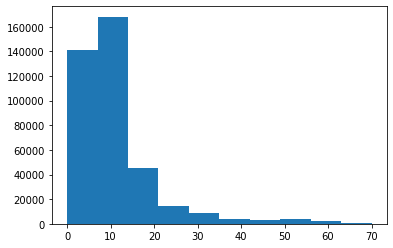

In [ ]:
plt.hist(
    df3.loc[(df3['fare_amount'] >= 0) & (df3['fare_amount'] <= 70)]['fare_amount'],bins=10)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+01, 2.94995e+05,
        6.68800e+04, 1.61350e+04, 6.12000e+03, 6.44600e+03, 5.29000e+02]),
 array([-44.9      , -33.41     , -21.920002 , -10.430001 ,   1.0599991,
         12.549999 ,  24.039999 ,  35.53     ,  47.02     ,  58.51     ,
         70.       ], dtype=float32),
 <a list of 10 Patch objects>)

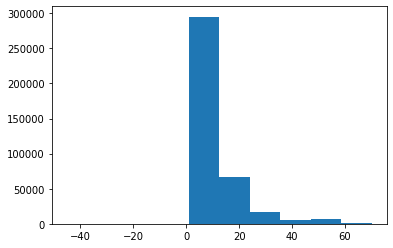

In [ ]:
plt.hist(
    df3.loc[(df3['distance'] >= 0) & (df3['fare_amount'] <= 70)]['fare_amount'],bins=10)

(array([378960.,  12424.]),
 array([ 0.      , 12.493085, 24.98617 ], dtype=float32),
 <a list of 2 Patch objects>)

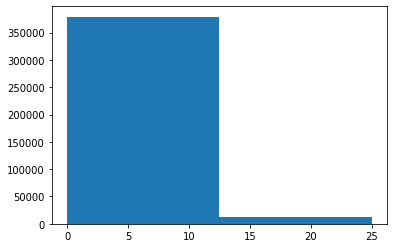

In [ ]:
plt.hist(
    df3.loc[(df3['distance'] >= 0) & (df3['distance'] <= 25)]['distance'],bins=2)

https://www.netstate.com/states/geography/ny_geography.htm

In [ ]:
%%time
df3.to_csv('NY_Updated_Data.csv', index=False)

In [ ]:
%%time
df3_test.to_csv('NY_Updated_Test_Data.csv', index=False)

CPU times: user 71.4 ms, sys: 3.82 ms, total: 75.2 ms
Wall time: 83.3 ms


## Data Cleaning

In [25]:
def dataClean(df):
    # drop all rows where fare amount is less than 50 cent or higher than $150.

    df.drop(df[df['fare_amount'] < 0.5].index, axis=0, inplace = True)
    df.drop(df[df['fare_amount'] > 150].index, axis=0, inplace = True)

    # drop all rows where passenger count is zero

    df.drop(df[df['passenger_count'] == 0].index, axis=0, inplace = True)

    # drop all row where long and lat is outside newyork

    df.drop(df[(df.pickup_longitude < -79) | (df.pickup_longitude > -71) | 
              (df.pickup_latitude < 40) | (df.pickup_latitude > 45)].index,axis=0,inplace=True)

    df.drop(df[(df.dropoff_longitude < -79) | (df.dropoff_longitude > -71) | 
              (df.dropoff_latitude < 40) | (df.dropoff_latitude > 45)].index,axis=0,inplace=True)
    
    # Drop all rows where fare amount is not in line with distance
    df.drop(df[(df.fare_amount > 5) & (df.geopyDesic_dist < 0.001)].index, axis=0, inplace = True)
    df.drop(df[(df.fare_amount < 20) & (df.geopyDesic_dist >150)].index, axis=0, inplace = True)


    return df

In [26]:
df3.shape

(391748, 19)

In [27]:
dataClean(df3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,night,geopyDesic_dist,geopyGrtCir_dist,distance,dist_group,latdiff,londiff,euclidean
0,4.50,-73.84,40.72,-73.84,40.71,1,2009,15,6,0,17,0,1.03,1.03,1.03,1,0.01,-0.00,0.01
1,16.90,-74.02,40.71,-73.98,40.78,1,2010,5,1,1,16,0,8.44,8.45,8.45,2,-0.07,-0.04,0.08
2,5.70,-73.98,40.76,-73.99,40.75,2,2011,18,8,3,0,1,1.39,1.39,1.39,1,0.01,0.01,0.01
3,7.70,-73.99,40.73,-73.99,40.76,1,2012,21,4,5,4,1,2.80,2.80,2.80,1,-0.02,0.00,0.03
4,5.30,-73.97,40.77,-73.96,40.78,1,2010,9,3,1,7,0,2.00,2.00,2.00,1,-0.02,-0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,7.00,-73.99,40.73,-74.01,40.73,1,2013,25,11,0,12,0,1.60,1.60,1.60,1,0.00,0.02,0.02
399996,8.50,-73.99,40.75,-73.99,40.77,2,2013,17,12,1,10,0,2.14,2.14,2.14,1,-0.02,-0.00,0.02
399997,35.00,-73.99,40.67,-73.96,40.77,1,2014,17,12,2,7,0,10.51,10.52,10.52,2,-0.09,-0.03,0.10
399998,14.10,-73.98,40.73,-73.99,40.78,4,2011,16,1,6,16,0,5.46,5.47,5.47,1,-0.05,0.00,0.05


In [28]:
df3.shape

(387143, 19)

## Save DF to CSV /feather*

In [ ]:
df3 = pd.read_feather('NY_Updated_Data.feather')

In [ ]:
df3.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'day', 'month', 'weekday', 'hour', 'distance', 'geopyDesic_dist',
       'geopyGrtCir_dist', 'Fare per k/m'],
      dtype='object')

In [ ]:
df3.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,distance,geopyDesic_dist,geopyGrtCir_dist,Fare per k/m
count,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000,385221.000000
mean,11.301880,-73.998222,40.874714,-73.998268,40.875866,1.690251,2011.744684,15.671721,6.276299,3.041693,13.510600,3.389573,3.390619,3.389580,5.435536
std,9.470420,0.046377,0.127075,0.045571,0.128576,1.306367,1.867031,8.681774,3.439939,1.948550,6.510648,3.965195,3.969135,3.965470,21.657330
min,2.500000,-78.650909,40.052723,-78.659447,40.041180,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.002553,0.002129,0.002129,0.020000
25%,6.000000,-73.992287,40.736637,-73.991554,40.735695,1.000000,2010.000000,8.000000,3.000000,1.000000,9.000000,1.285923,1.286503,1.285871,2.970000
50%,8.500000,-73.982109,40.753471,-73.980591,40.753960,1.000000,2012.000000,16.000000,6.000000,3.000000,14.000000,2.185232,2.185659,2.185190,3.810000
75%,12.500000,-73.968498,40.767525,-73.965446,40.768414,2.000000,2013.000000,23.000000,9.000000,5.000000,19.000000,3.964424,3.963499,3.964440,5.030000
max,281.049988,-71.056412,43.183331,-71.035461,43.415192,6.000000,2015.000000,31.000000,12.000000,6.000000,23.000000,343.669189,344.545070,343.669544,993.400024


## Exploratory Data Analysis

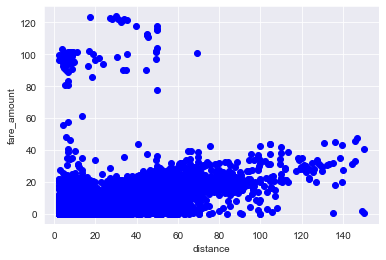

In [ ]:
plt.scatter(df3.fare_amount, df3.distance,color='blue')
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show();

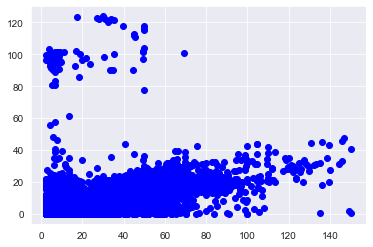

In [ ]:
plt.scatter( df3.fare_amount,df3.distance,color='blue')
plt.show();

In [ ]:
## 

## prepare the dataset for training

In [29]:
df3.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'day', 'month', 'weekday', 'hour', 'night', 'geopyDesic_dist',
       'geopyGrtCir_dist', 'distance', 'dist_group', 'latdiff', 'londiff',
       'euclidean'],
      dtype='object')

In [ ]:
# Drop unwanted columns
dropped_columns = ['pickup_longitude', 'pickup_latitude', 
                   'dropoff_longitude', 'dropoff_latitude','distance']
df3 = df3.drop(dropped_columns, axis=1)

In [30]:
df4=df3.copy()

In [31]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = df4.columns[1:], df4.columns[:1]
inputs_df, targets = df4[input_cols].copy(), df4[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = df4[input_cols].select_dtypes(include=np.number).columns.tolist()


In [32]:
imputer = SimpleImputer().fit(inputs_df[numeric_cols])

### #Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [33]:

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols], targets, test_size=0.20, random_state=42)

## decision tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [35]:
tree = DecisionTreeRegressor(random_state=42)

In [36]:
# Fit the model to the training data
tree.fit(train_inputs,train_targets)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [37]:
tree_train_preds = tree.predict(train_inputs)

In [38]:
tree_train_preds

array([ 8.89999962, 11.69999981, 15.        , ..., 57.33000183,
       14.5       ,  6.5       ])

In [39]:
tree_train_rmse = mean_squared_error(train_targets,tree_train_preds,squared=False)

In [40]:
tree_val_preds = tree.predict(val_inputs)

In [41]:
tree_val_rmse = mean_squared_error(val_targets,tree_val_preds,squared=False)

In [42]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 4.75847841564057


In [43]:
df4['fare_amount'].mean()

11.297341346740723

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

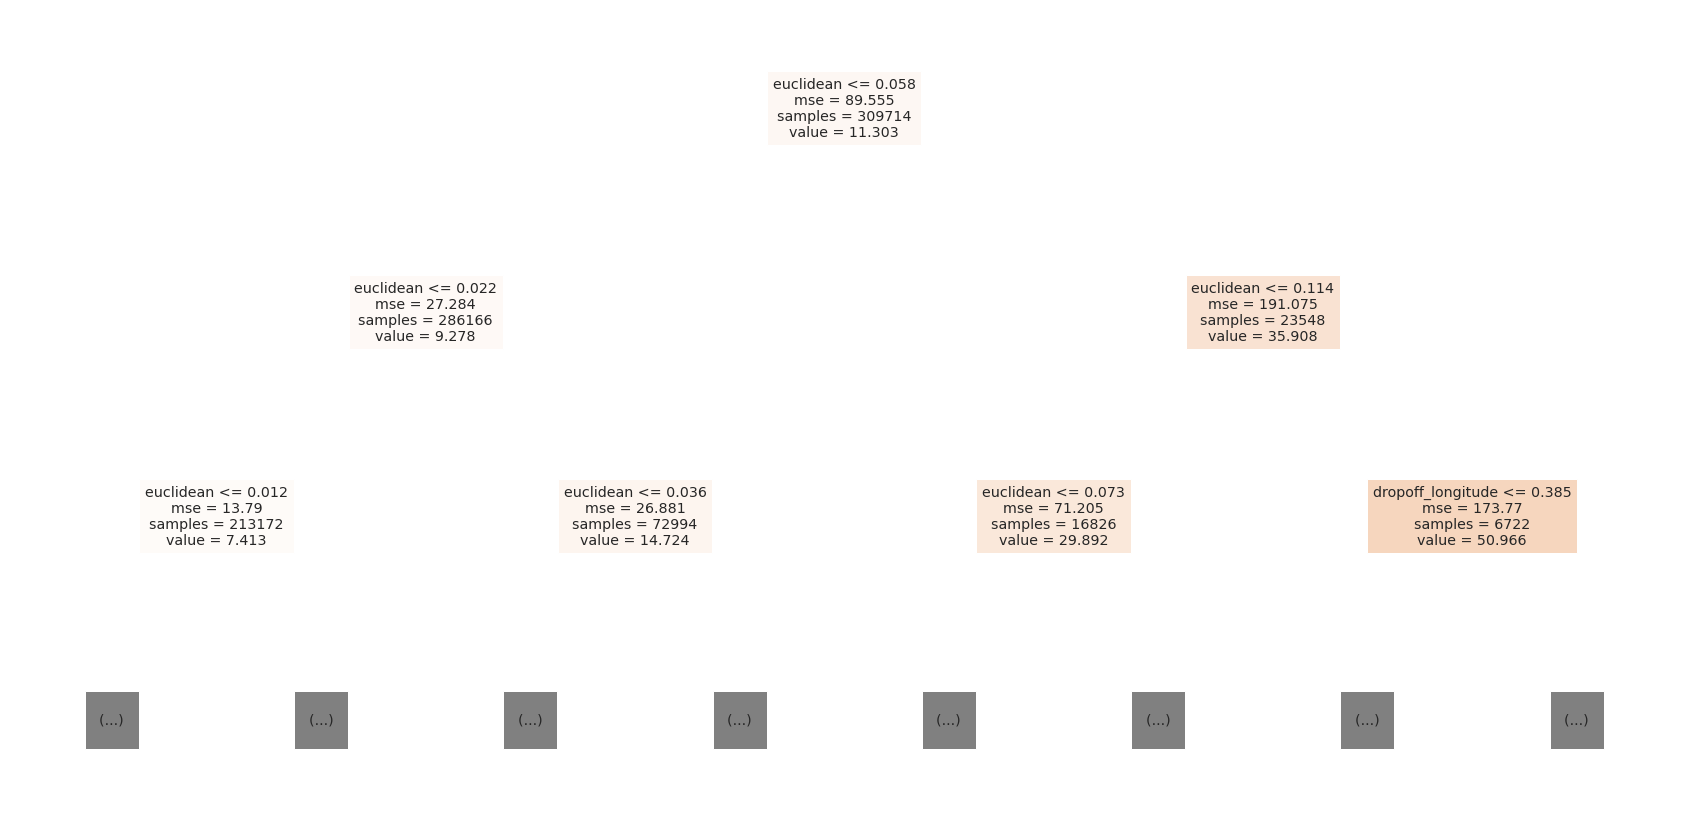

In [ ]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(tree, feature_names=train_inputs.columns, max_depth=2, filled=True);

In [ ]:
# Visualize the tree textually using export_text
tree_text = export_text(tree, max_depth=10, feature_names=list(train_inputs.columns))

In [ ]:
# Display the first few lines
print(tree_text[:2000])

|--- euclidean <= 0.06
|   |--- euclidean <= 0.02
|   |   |--- euclidean <= 0.01
|   |   |   |--- dropoff_longitude <= 0.44
|   |   |   |   |--- pickup_longitude <= 0.37
|   |   |   |   |   |--- euclidean <= 0.00
|   |   |   |   |   |   |--- euclidean <= 0.00
|   |   |   |   |   |   |   |--- day <= 0.65
|   |   |   |   |   |   |   |   |--- year <= 0.42
|   |   |   |   |   |   |   |   |   |--- month <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [2.50]
|   |   |   |   |   |   |   |   |   |--- month >  0.09
|   |   |   |   |   |   |   |   |   |   |--- pickup_longitude <= 0.37
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- pickup_longitude >  0.37
|   |   |   |   |   |   |   |   |   |   |   |--- value: [3.30]
|   |   |   |   |   |   |   |   |--- year >  0.42
|   |   |   |   |   |   |   |   |   |--- value: [2.50]
|   |   |   |   |   |   |   |--- day >  0.65
|   |   |   |   |   |   |   |   |--- value: [2

In [ ]:
# Check feature importance
tree_importances = tree.feature_importances_

In [ ]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [ ]:
tree_importance_df

,feature,importance
16,euclidean,0.80
2,dropoff_longitude,0.03
5,year,0.02
3,dropoff_latitude,0.02
14,latdiff,0.02
15,londiff,0.02
0,pickup_longitude,0.02
11,geopyDesic_dist,0.01
1,pickup_latitude,0.01
13,distance,0.01


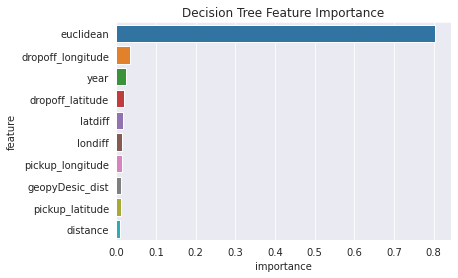

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

## Random Forests

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
# Create the model
rf1 = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4,random_state=42)

In [47]:
# Fit the model
rf1.fit(train_inputs,train_targets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
rf1_train_preds = rf1.predict(train_inputs)

In [49]:
rf1_train_rmse = mean_squared_error(train_targets,rf1_train_preds,squared=False)

In [50]:
rf1_val_preds = rf1.predict(val_inputs)

In [51]:
rf1_val_rmse = mean_squared_error(val_targets,rf1_val_preds,squared=False)

In [52]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 3.331035948981638, Validation RMSE: 3.512552306225089


### Hyperparameter Tuning


In [83]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [84]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [86]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: ignored

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

In [ ]:
test_params(n_estimators, [15,30,45,60,75,90,105])

#### This seems to be a best fit param for RandomForrest

In [ ]:
test_params(n_estimators=35, max_depth=10)

### XGBRegressor

In [53]:
from xgboost import XGBRegressor

In [68]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets,squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets,squared=False)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


In [54]:
?XGBRegressor

In [75]:
rf2 = XGBRegressor(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4,random_state=42)


In [76]:
rf2.fit(train_inputs,train_targets)


[16:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, max_features=0.4, min_child_weight=1,
             min_samples_leaf=4, missing=None, n_estimators=50, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [77]:
rf2_train_preds = rf2.predict(train_inputs)

In [78]:
rf2_train_rmse = mean_squared_error(train_targets,rf2_train_preds,squared=False)

In [79]:
rf2_val_preds = rf2.predict(val_inputs)

In [80]:
rf2_val_rmse = mean_squared_error(val_targets,rf2_val_preds,squared=False)

In [81]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 2.626535415649414, Validation RMSE: 3.308532476425171


In [82]:
test_params(booster='gblinear')

[16:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 9.423067092895508, Validation RMSE: 9.3563871383667


## KNN

# Validate Test Data

In [ ]:

df3_test.columns

Index(['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'day', 'month',
       'weekday', 'hour', 'night', 'geopyDesic_dist', 'geopyGrtCir_dist',
       'distance', 'dist_group', 'latdiff', 'londiff', 'euclidean'],
      dtype='object')

In [ ]:
selected_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'day', 'month',
       'weekday', 'hour', 'night', 'geopyDesic_dist', 'geopyGrtCir_dist',
       'distance', 'latdiff', 'londiff', 'euclidean']

In [ ]:
train_inputs.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'day', 'month',
       'weekday', 'hour', 'night', 'geopyDesic_dist', 'geopyGrtCir_dist',
       'distance', 'latdiff', 'londiff', 'euclidean'],
      dtype='object')

In [ ]:
inputs_df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'day', 'month',
       'weekday', 'hour', 'night', 'geopyDesic_dist', 'geopyGrtCir_dist',
       'distance', 'latdiff', 'londiff', 'euclidean', 'dist_group'],
      dtype='object')

In [ ]:
a=rf1.predict(df3_test[selected_cols])

In [ ]:
a[:100]

array([39.61213208, 38.89189247, 35.63002584, 41.02556191, 42.29520364,
       41.39750417, 39.01708818, 72.48294321, 39.95908342, 39.22160984,
       39.61213208, 41.94495211, 36.75095583, 41.63629928, 40.15557329,
       42.29520364, 46.75954704, 39.95841779, 35.70202584, 37.96179247,
       40.10189524, 38.89189247, 39.22160984, 40.97063033, 42.15167864,
       39.20026983, 63.62080301, 54.28495665, 38.35844529, 41.66062478,
       39.96946778, 39.24488257, 38.35844529, 39.96946778, 40.71825013,
       39.51050307, 38.35844529, 39.24488257, 40.43416974, 35.63002584,
       49.68880853, 39.96946778, 49.01722043, 39.61213208, 35.63002584,
       39.51930956, 39.01708818, 39.20026983, 39.22160984, 35.63002584,
       39.17009052, 39.95908342, 49.01722043, 38.35844529, 39.20026983,
       41.66062478, 39.86411863, 40.00028099, 39.95908342, 39.95908342,
       39.51050307, 38.91916638, 35.63002584, 38.22380247, 39.20026983,
       39.20026983, 38.91916638, 38.35844529, 35.63002584, 42.15

In [ ]:
df3_test

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,hour,night,geopyDesic_dist,geopyGrtCir_dist,distance,dist_group,latdiff,londiff,euclidean
0,2015-01-27 13:08:24.0000002,-73.97,40.76,-73.98,40.74,1,2015,27,1,1,13,0,2.32,2.32,2.32,1,0.02,0.01,0.02
1,2015-01-27 13:08:24.0000003,-73.99,40.72,-74.00,40.74,1,2015,27,1,1,13,0,2.42,2.43,2.43,1,-0.02,0.01,0.02
2,2011-10-08 11:53:44.0000002,-73.98,40.75,-73.98,40.75,1,2011,8,10,5,11,0,0.62,0.62,0.62,1,0.01,-0.00,0.01
3,2012-12-01 21:12:12.0000002,-73.98,40.77,-73.99,40.75,1,2012,1,12,5,21,1,1.96,1.96,1.96,1,0.02,0.01,0.02
4,2012-12-01 21:12:12.0000003,-73.97,40.79,-73.99,40.74,1,2012,1,12,5,21,1,5.38,5.39,5.39,1,0.05,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,-73.97,40.80,-73.96,40.78,6,2015,10,5,6,12,0,2.12,2.12,2.12,1,0.02,-0.01,0.02
9910,2015-01-12 17:05:51.0000001,-73.95,40.80,-73.96,40.78,6,2015,12,1,0,17,0,3.27,3.27,3.27,1,0.03,0.01,0.03
9911,2015-04-19 20:44:15.0000001,-73.99,40.73,-73.79,40.65,6,2015,19,4,6,20,1,19.22,19.18,19.18,4,0.08,-0.20,0.22
9912,2015-01-31 01:05:19.0000005,-73.99,40.74,-73.94,40.80,6,2015,31,1,5,1,1,8.34,8.34,8.34,2,-0.07,-0.05,0.08


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = df3.columns[1:], df3.columns[:1]
inputs_df, targets = df3[input_cols].copy(), df3[target_col].copy()